In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('application_data.csv')

In [4]:
df.shape

(307511, 122)

In [5]:
column_names = list(df.columns)


In [6]:
df.head(7)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0


In [7]:
df.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [11]:
df.NAME_CONTRACT_TYPE.value_counts() #Categorical Variable

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [12]:
df.NAME_CONTRACT_TYPE.isnull().sum() #No null values

0

In [13]:
df.FLAG_OWN_CAR.value_counts() #Categorical Variable

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [14]:
df.FLAG_OWN_CAR.isnull().sum() #No null values

0

In [15]:
df.CNT_CHILDREN.value_counts() #Discrete Variable

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [16]:
df.CNT_CHILDREN.isnull().sum()

0

In [17]:
df.AMT_INCOME_TOTAL.describe() #Continuous variable

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [18]:
df.AMT_INCOME_TOTAL.isnull().sum()

0

In [19]:
df.AMT_CREDIT.describe() #Continuous variable

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [20]:
df.AMT_CREDIT.isnull().sum()

0

In [21]:
df.AMT_ANNUITY.isnull().sum() #missing value percentage 3.9-05

12

In [22]:
df.AMT_ANNUITY.describe() #Continuous variable

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [23]:
df.NAME_INCOME_TYPE.value_counts() #Nominal Variable

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [24]:
df.NAME_INCOME_TYPE.isnull().sum()

0

In [25]:
df.NAME_EDUCATION_TYPE.value_counts() #Categorical Variable

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [26]:
df.NAME_EDUCATION_TYPE.isnull().sum()

0

In [27]:
df.NAME_FAMILY_STATUS.value_counts() #Nominal Variable

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [28]:
df.NAME_FAMILY_STATUS.isnull().sum()

0

In [29]:
def ratioF(CNT_FAM_MEMBERS,CNT_CHILDREN):
    return CNT_CHILDREN/CNT_FAM_MEMBERS

In [30]:
v = np.vectorize(ratioF)
df['FAMILY_RATIO'] = v(df.CNT_FAM_MEMBERS,df.CNT_CHILDREN)

In [31]:
df.REGION_POPULATION_RELATIVE.describe() #Continuous variables

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

In [32]:
df.DAYS_BIRTH.dtype 

dtype('int64')

In [33]:
df.DAYS_BIRTH.describe() #Continuous variables

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [34]:
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: abs(x))

In [35]:
df.DAYS_BIRTH.describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [36]:
df.DAYS_BIRTH.isnull().sum()

0

In [37]:
def ageproper(l):
    x = l%365
    y = l//365
    z = x//30
    return y,'yr',z,'mo'

In [38]:

df['AGE'] = df['DAYS_BIRTH'].apply(ageproper)

In [39]:
df['AGE'].head()

0    (25, yr, 11, mo)
1    (45, yr, 11, mo)
2     (52, yr, 2, mo)
3     (52, yr, 0, mo)
4     (54, yr, 7, mo)
Name: AGE, dtype: object

In [40]:
df.DAYS_EMPLOYED.isnull().sum() #Continuous variables

0

In [41]:
df['DAYS_EMPLOYED'] = df.DAYS_EMPLOYED.apply(lambda x: abs(x))

In [42]:
df['EMPLOYMENT_HISTORY'] = df['DAYS_EMPLOYED'].apply(ageproper)

In [43]:
print(df.FLAG_MOBIL.isnull().sum())
print(df.FLAG_CONT_MOBILE.isnull().sum())
print(df.FLAG_EMAIL.isnull().sum())
print(df.FLAG_PHONE.isnull().sum())

#They are all categoricl variables 

0
0
0
0


In [44]:
df.OCCUPATION_TYPE.value_counts() #Nominal variable

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [45]:
df.OCCUPATION_TYPE.isnull().sum() #31.3% missingvalue

96391

In [46]:
print(df.REGION_RATING_CLIENT.isnull().sum())
print(df.REGION_RATING_CLIENT_W_CITY.isnull().sum())
#Ordinal variables

0
0


In [47]:
def regionR(REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY):
    count = 0
    count = REGION_RATING_CLIENT+REGION_RATING_CLIENT_W_CITY
    if count >5:
        return 'Very High'
    elif count>4:
        return 'High'
    elif count>3:
        return 'Moderate'
    elif count>3:
        return 'Average'
    elif count>2:
        return 'Low'
    else:
        return 'Very Low'

In [48]:
v = np.vectorize(regionR)
df['REGION_RATING'] = v(df.REGION_RATING_CLIENT,df.REGION_RATING_CLIENT_W_CITY)
#The region of residence has been categorized into four variables based on their region and city ratings.

In [49]:
df['REGION_RATING'].value_counts() #Categorical Vriable

Moderate     226458
Very High     43860
Very Low      32197
High           3748
Low            1248
Name: REGION_RATING, dtype: int64

In [135]:

print(df.ORGANIZATION_TYPE.value_counts())
#18% Missing value
#Nominal variable

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [51]:
df.EXT_SOURCE_1.isnull().sum() #56% missing value
#Ordinal variables

173378

In [52]:
41519/307511

0.13501630835970097

In [53]:
df.EXT_SOURCE_2.isnull().sum() #0.2% missing value
#Ordinal variables

660

In [54]:
df.EXT_SOURCE_3.isnull().sum() #19.8% missing value
#Ordinal variables

60965

In [55]:
df.APARTMENTS_AVG.isnull().sum() #50.7% missing value

156061

In [56]:
df.YEARS_BUILD_AVG.isnull().sum() #66.5% missing value

204488

In [57]:
df.NONLIVINGAPARTMENTS_AVG.isnull().sum() #69.4% missing value

213514

The data regarding the housing section have high numbers of missing values, so we will not include them in our analysis.

In [58]:
print(df.OBS_30_CNT_SOCIAL_CIRCLE.isnull().sum()) 
print(df.DEF_30_CNT_SOCIAL_CIRCLE.isnull().sum())
print(df.OBS_60_CNT_SOCIAL_CIRCLE.isnull().sum())
print(df.DEF_60_CNT_SOCIAL_CIRCLE.isnull().sum())
#all these columns have 0.3% missing value, and seem to be missing in the same rows
#Discrete variables

1021
1021
1021
1021


In [59]:
df.DAYS_LAST_PHONE_CHANGE.isnull().sum()

1

In [60]:
print(df.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum())
print(df.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum())
print(df.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum())
print(df.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum())
print(df.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum())
print(df.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum())
#Discrete variables
# again all these columns have 13.5% missing value, and seem to be missing in the same rows

41519
41519
41519
41519
41519
41519


Instead of dropping the columns with high % of missing value,
or the ones unnecessary for analysis,I will create a new datafram only with the variables that I need.

In [61]:
test = df[['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','REGION_RATING','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','EXT_SOURCE_2','EXT_SOURCE_3','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']]

In [62]:
test.head(5)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,...,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_2,EXT_SOURCE_3,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,Working,...,0.018801,9461,637,0.262949,0.139376,2.0,2.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,State servant,...,0.003541,16765,1188,0.622246,NaN,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,135000.0,Working,...,0.010032,19046,225,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,297000.0,Working,...,0.008019,19005,3039,0.650442,NaN,0.0,0.0,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,121500.0,513000.0,21865.5,513000.0,Working,...,0.028663,19932,3038,0.322738,NaN,0.0,0.0,0.0,0.0,0.0


In [63]:
Set1 = df[(df['FLAG_MOBIL']==1) & (df['FLAG_CONT_MOBILE']==1)]

#Set 1 has clients who are reachable over phone
#insted of df we could Set1 if we wanted to filter against clients only who are reachable overphone

In [64]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      307511 non-null  int64  
 1   NAME_CONTRACT_TYPE          307511 non-null  object 
 2   CODE_GENDER                 307511 non-null  object 
 3   FLAG_OWN_CAR                307511 non-null  object 
 4   FLAG_OWN_REALTY             307511 non-null  object 
 5   AMT_INCOME_TOTAL            307511 non-null  float64
 6   AMT_CREDIT                  307511 non-null  float64
 7   AMT_ANNUITY                 307499 non-null  float64
 8   AMT_GOODS_PRICE             307233 non-null  float64
 9   NAME_INCOME_TYPE            307511 non-null  object 
 10  NAME_EDUCATION_TYPE         307511 non-null  object 
 11  NAME_FAMILY_STATUS          307511 non-null  object 
 12  NAME_HOUSING_TYPE           307511 non-null  object 
 13  REGION_RATING 

BINNING

In [65]:
test.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [66]:
test['INCOME_BINS'] = pd.cut(test.AMT_INCOME_TOTAL, bins=[10000,50000,100000,125000,187000,250000,500000,150000000], labels=['L1','L2','L3','L4','L5','L6','L7'])

<AxesSubplot:>

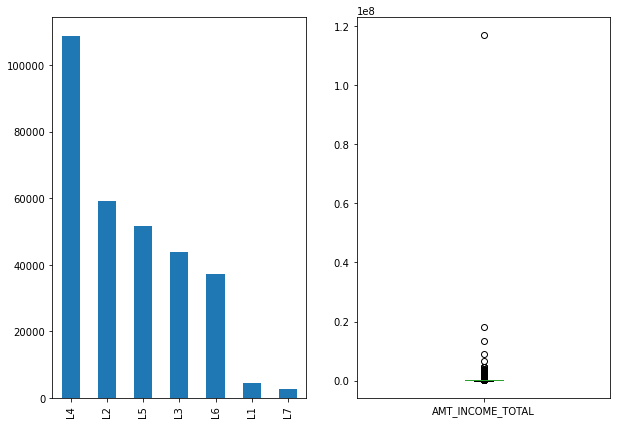

In [151]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
test['INCOME_BINS'].value_counts().plot(kind = 'bar')
plt.subplot(1,2,2)
test.AMT_INCOME_TOTAL.plot(kind='box')
#AMT_INCOME_TOTAL has been binned into SEVEN labels 
#there are outliers in this column in L7

In [68]:
test.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [69]:
test['CREDIT_BINS'] = pd.cut(test.AMT_CREDIT, bins=[10000,200000,275000,350000,500000,750000,1000000,150000000], labels=['L1','L2','L3','L4','L5','L6','L7'])

<AxesSubplot:>

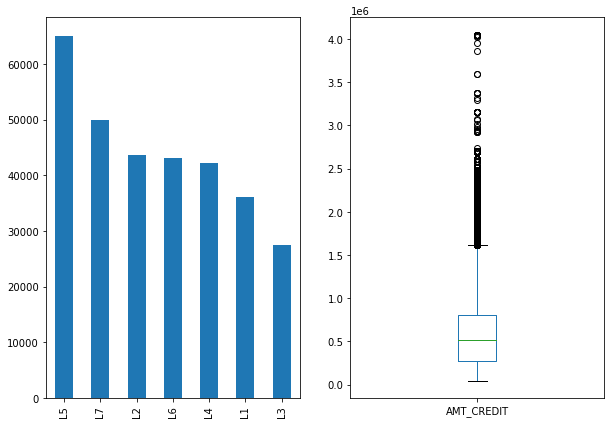

In [152]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
test.CREDIT_BINS.value_counts().plot(kind='bar')
plt.subplot(1,2,2)
test.AMT_CREDIT.plot(kind='box')
#This variable too has outliers

In [71]:
test.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [72]:
test['GOODS_PRICE_BINS'] = pd.cut(test.AMT_GOODS_PRICE, bins=[40000,125000,187000,450000,600000,675000,875000,150000000], labels=['L1','L2','L3','L4','L5','L6','L7'])

<AxesSubplot:>

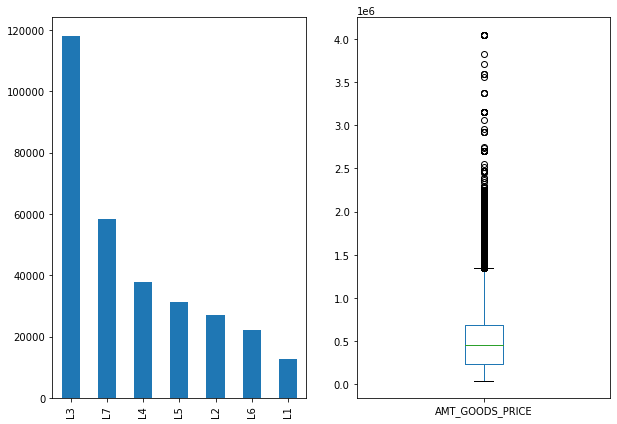

In [153]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
test.GOODS_PRICE_BINS.value_counts().plot(kind='bar')
plt.subplot(1,2,2)
test.AMT_GOODS_PRICE.plot(kind='box')
#This column has outliers

In [74]:
v1 = test[test['TARGET']==1] #Target value=1
v0 = test[test['TARGET']==0] #Target value=0

In [75]:
print(v1.shape)
print(v0.shape)

(24825, 27)
(282686, 27)


ANALYSIS: UNIVARIATE and BIVARIATE

Text(0.5, 1.0, 'Non-Churn')

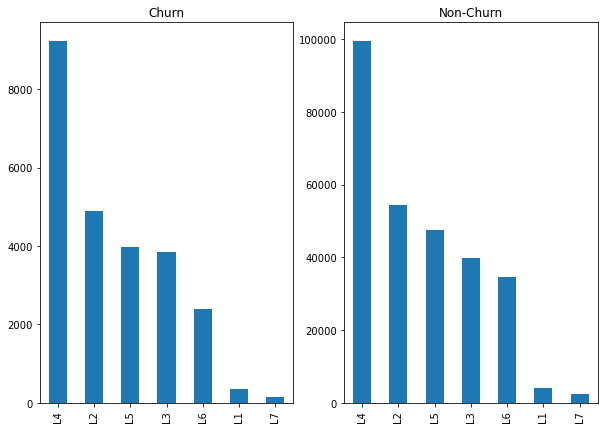

In [136]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
v1.INCOME_BINS.value_counts().plot(kind='bar')
plt.title('Churn')
plt.subplot(1,2,2)
v0.INCOME_BINS.value_counts().plot(kind='bar')
plt.title('Non-Churn')

#Bins are of the same range for v1 nd v0.
# L5 has lesser churn

In [77]:
test.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_RATING',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'INCOME_BINS', 'CREDIT_BINS', 'GOODS_PRICE_BINS'],
      dtype='object')

Text(0.5, 1.0, 'Non-Churn')

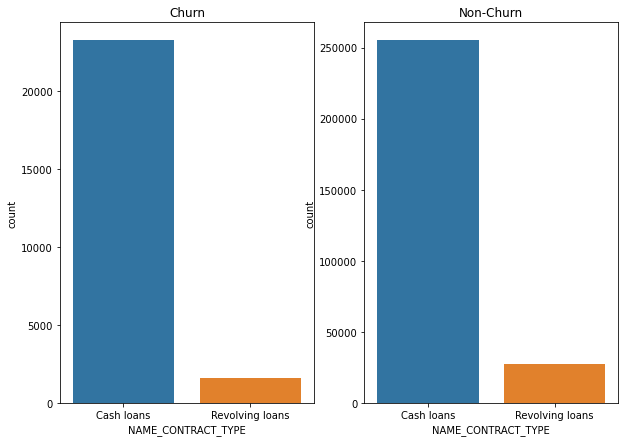

In [137]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.countplot(v1.NAME_CONTRACT_TYPE)
plt.title('Churn')
plt.subplot(1,2,2)
sns.countplot(v0.NAME_CONTRACT_TYPE)
plt.title('Non-Churn')
#Revolving loan types have lesser churn count. 
#For Cash loans it is almost same

Text(0.5, 1.0, 'Non-Churn')

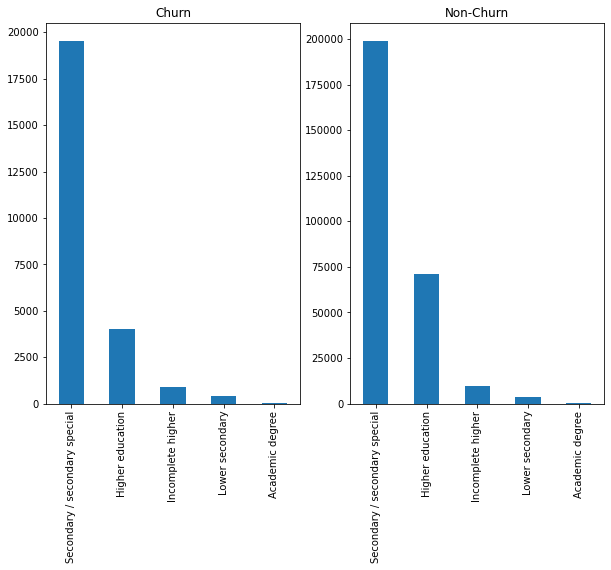

In [138]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
v1.NAME_EDUCATION_TYPE.value_counts().plot(kind='bar')
plt.title('Churn')
plt.subplot(1,2,2)
v0.NAME_EDUCATION_TYPE.value_counts().plot(kind='bar')
plt.title('Non-Churn')
#Higher Educated people have had lesser Churn

Text(0.5, 1.0, 'Non-Churn')

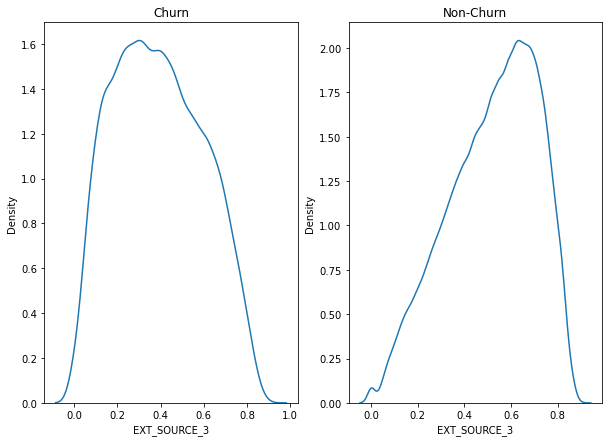

In [139]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.distplot(v1.EXT_SOURCE_3, hist=False)
plt.title('Churn')
plt.subplot(1,2,2)
sns.distplot(v0.EXT_SOURCE_3, hist=False)
plt.title('Non-Churn')
#for churn customers EXT_SOURCE_3 follows a more or less normal distribution
#for non Churn customers the density increases upto 0.65, then it decreases sharply

Text(0.5, 1.0, 'Non-Churn')

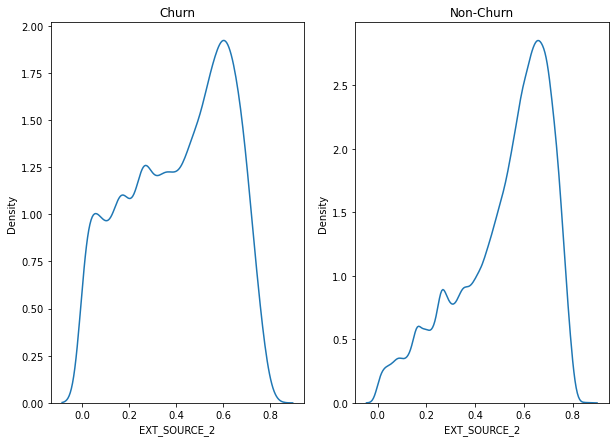

In [140]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.distplot(v1.EXT_SOURCE_2, hist=False)
plt.title('Churn')
plt.subplot(1,2,2)
sns.distplot(v0.EXT_SOURCE_2, hist=False)
plt.title('Non-Churn')
#for churn customers the density upto 0.6 is higher than non churn customers
#non churn customers have higher value of EXT_SOURCE_2 ratings

Text(0.5, 1.0, 'Non-Churn')

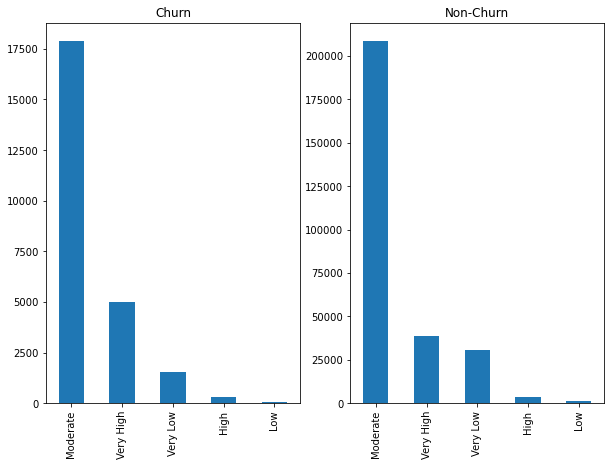

In [141]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
v1.REGION_RATING.value_counts().plot(kind='bar')
plt.title('Churn')
plt.subplot(1,2,2)
v0.REGION_RATING.value_counts().plot(kind='bar')
plt.title('Non-Churn')
#customers with target value=1 live in localities with low ratings. 

Text(0.5, 1.0, 'Non-Churn')

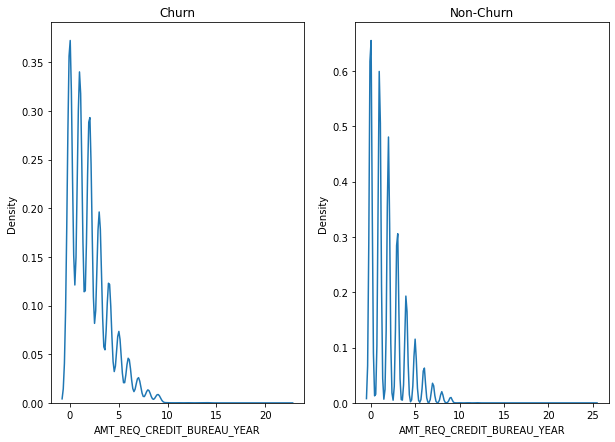

In [144]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.distplot(v1.AMT_REQ_CREDIT_BUREAU_YEAR, hist=False)
plt.title('Churn')
plt.subplot(1,2,2)
sns.distplot(v0.AMT_REQ_CREDIT_BUREAU_YEAR, hist=False)
plt.title('Non-Churn')
#Targetvalue=1 customers have faced more enquiries from the Credit Beaureau

Text(0.5, 1.0, 'Non-Churn')

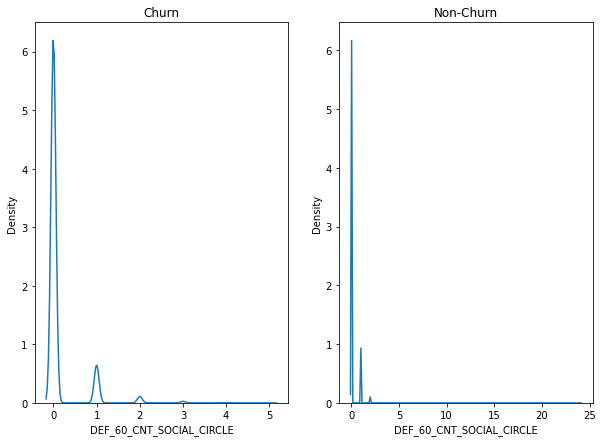

In [142]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.distplot(v1.DEF_60_CNT_SOCIAL_CIRCLE, hist=False)
plt.title('Churn')
plt.subplot(1,2,2)
sns.distplot(v0.DEF_60_CNT_SOCIAL_CIRCLE, hist=False)
plt.title('Non-Churn')
#Churn customers in general live around more customers who have previously defaulted 

Text(0.5, 1.0, 'Non-Churn')

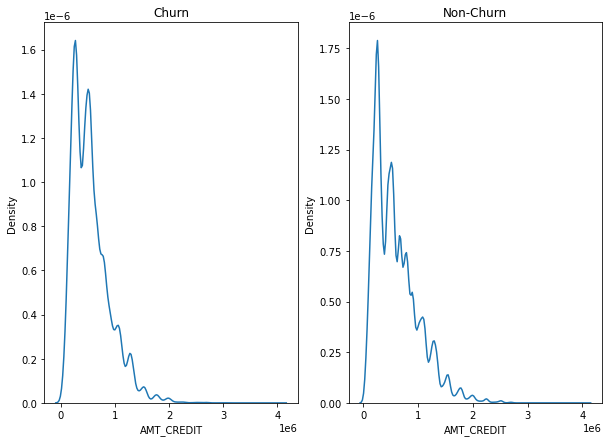

In [145]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.distplot(v1.AMT_CREDIT, hist=False)
plt.title('Churn')
plt.subplot(1,2,2)
sns.distplot(v0.AMT_CREDIT, hist=False)
plt.title('Non-Churn')
#Churn customers have lower credit density 
#Higher amount of loans have better chance of getting paid?

Text(0.5, 1.0, 'Non-Churn')

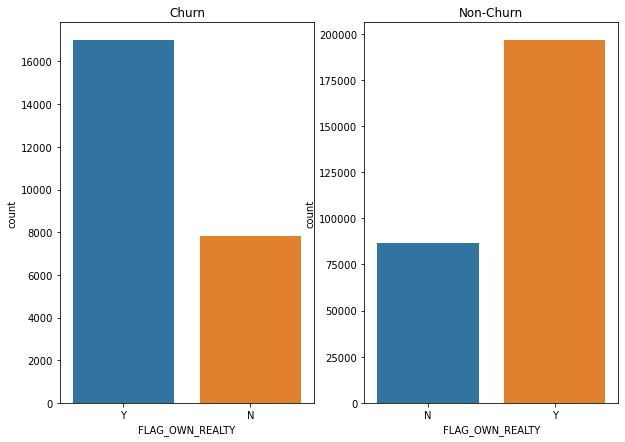

In [146]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.countplot(v1.FLAG_OWN_REALTY)
plt.title('Churn')
plt.subplot(1,2,2)
sns.countplot(v0.FLAG_OWN_REALTY)
plt.title('Non-Churn')
#those who have not defaulted in general own more real estate

Text(0.5, 1.0, 'Non-Churn')

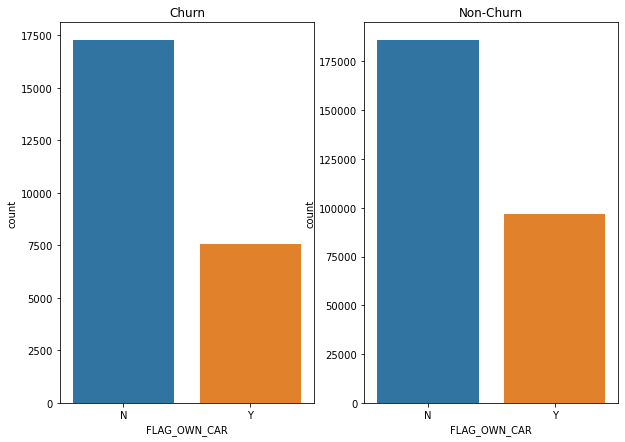

In [147]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.countplot(v1.FLAG_OWN_CAR)
plt.title('Churn')
plt.subplot(1,2,2)
sns.countplot(v0.FLAG_OWN_CAR)
plt.title('Non-Churn')
#those who have defaulted own lesser number of curs

Text(0.5, 1.0, 'Non-Churn')

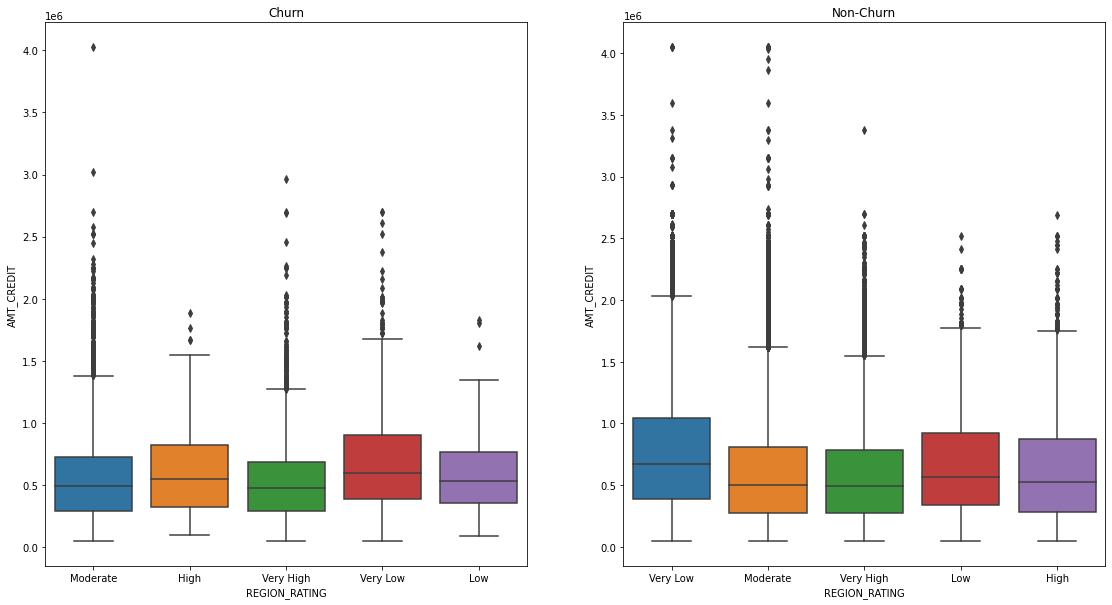

In [88]:
plt.figure(figsize = (19,10))
plt.subplot(1,2,1)
sns.boxplot(x='REGION_RATING', y='AMT_CREDIT', data = v1)
plt.title('Churn')
plt.subplot(1,2,2)
sns.boxplot(x='REGION_RATING', y='AMT_CREDIT', data = v0)
plt.title('Non-Churn')
# more people who have defaulted belong to moderate region ratings, or from either very high or very low ratings.


Finding the highest correlation pairs

In [90]:
corr_1 = v1.corr()
corr1_df = corr_1.where(np.triu(np.ones(corr_1.shape),k=1).astype(np.bool))

In [91]:
corr1_df = corr1_df.unstack().reset_index()
corr1_df #for TARGET value = 1

,level_0,level_1,0
0,TARGET,TARGET,NaN
1,TARGET,AMT_INCOME_TOTAL,NaN
2,TARGET,AMT_CREDIT,NaN
3,TARGET,AMT_ANNUITY,NaN
4,TARGET,AMT_GOODS_PRICE,NaN
...,...,...,...
220,AMT_REQ_CREDIT_BUREAU_YEAR,DEF_30_CNT_SOCIAL_CIRCLE,0.012222
221,AMT_REQ_CREDIT_BUREAU_YEAR,DEF_60_CNT_SOCIAL_CIRCLE,0.002692
222,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_MON,-0.002559
223,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,0.101756


In [92]:
corr1_df.columns = ['VAR1','VAR2','CORRELATION']
corr1_df.dropna(subset = ['CORRELATION'],inplace=True)
corr1_df

,VAR1,VAR2,CORRELATION
31,AMT_CREDIT,AMT_INCOME_TOTAL,0.038131
46,AMT_ANNUITY,AMT_INCOME_TOTAL,0.046421
47,AMT_ANNUITY,AMT_CREDIT,0.752195
61,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.037583
62,AMT_GOODS_PRICE,AMT_CREDIT,0.983103
...,...,...,...
219,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_3,-0.052539
220,AMT_REQ_CREDIT_BUREAU_YEAR,DEF_30_CNT_SOCIAL_CIRCLE,0.012222
221,AMT_REQ_CREDIT_BUREAU_YEAR,DEF_60_CNT_SOCIAL_CIRCLE,0.002692
222,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_MON,-0.002559


In [93]:
corr1_df['ABS_CORR'] = corr1_df['CORRELATION'].abs()

In [94]:
corr1_df = corr1_df.sort_values(by='ABS_CORR', ascending = False)


In [95]:
corr1_df.head(10) #top10 correlation pairs

,VAR1,VAR2,CORRELATION,ABS_CORR
62,AMT_GOODS_PRICE,AMT_CREDIT,0.983103,0.983103
175,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.868994,0.868994
63,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699,0.752699
47,AMT_ANNUITY,AMT_CREDIT,0.752195,0.752195
111,DAYS_EMPLOYED,DAYS_BIRTH,0.582185,0.582185
141,EXT_SOURCE_3,DAYS_BIRTH,0.171621,0.171621
125,EXT_SOURCE_2,REGION_POPULATION_RELATIVE,0.169751,0.169751
94,DAYS_BIRTH,AMT_GOODS_PRICE,0.135810,0.135810
92,DAYS_BIRTH,AMT_CREDIT,0.135316,0.135316
124,EXT_SOURCE_2,AMT_GOODS_PRICE,0.131184,0.131184


In [96]:
corr_2 = v0.corr() #for TARGET value = 0
corr2_df = corr_2.where(np.triu(np.ones(corr_2.shape),k=1).astype(np.bool))

In [97]:
corr2_df = corr2_df.unstack().reset_index()
corr2_df

,level_0,level_1,0
0,TARGET,TARGET,NaN
1,TARGET,AMT_INCOME_TOTAL,NaN
2,TARGET,AMT_CREDIT,NaN
3,TARGET,AMT_ANNUITY,NaN
4,TARGET,AMT_GOODS_PRICE,NaN
...,...,...,...
220,AMT_REQ_CREDIT_BUREAU_YEAR,DEF_30_CNT_SOCIAL_CIRCLE,0.018606
221,AMT_REQ_CREDIT_BUREAU_YEAR,DEF_60_CNT_SOCIAL_CIRCLE,0.018088
222,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_MON,-0.004889
223,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,0.074664


In [98]:
corr2_df.columns = ['VAR1','VAR2','CORRELATION']
corr2_df.dropna(subset = ['CORRELATION'],inplace=True)
corr2_df

,VAR1,VAR2,CORRELATION
31,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799
46,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953
47,AMT_ANNUITY,AMT_CREDIT,0.771309
61,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462
62,AMT_GOODS_PRICE,AMT_CREDIT,0.987250
...,...,...,...
219,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_3,-0.070355
220,AMT_REQ_CREDIT_BUREAU_YEAR,DEF_30_CNT_SOCIAL_CIRCLE,0.018606
221,AMT_REQ_CREDIT_BUREAU_YEAR,DEF_60_CNT_SOCIAL_CIRCLE,0.018088
222,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_MON,-0.004889


In [99]:
corr2_df.columns = ['VAR1','VAR2','CORRELATION']
corr2_df.dropna(subset = ['CORRELATION'],inplace=True)

In [100]:
corr2_df['ABS_CORR'] = corr2_df['CORRELATION'].abs()

In [101]:
df_corr2 = corr2_df.sort_values(by='ABS_CORR', ascending = False)

In [102]:
df_corr2.head(10) #top 10 correlation pairs

,VAR1,VAR2,CORRELATION,ABS_CORR
62,AMT_GOODS_PRICE,AMT_CREDIT,0.987250,0.987250
175,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.859332,0.859332
63,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686,0.776686
47,AMT_ANNUITY,AMT_CREDIT,0.771309,0.771309
111,DAYS_EMPLOYED,DAYS_BIRTH,0.626114,0.626114
46,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953,0.418953
61,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462,0.349462
31,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799,0.342799
125,EXT_SOURCE_2,REGION_POPULATION_RELATIVE,0.198493,0.198493
141,EXT_SOURCE_3,DAYS_BIRTH,0.197287,0.197287


In [106]:
corr1_df.head(10)

,VAR1,VAR2,CORRELATION,ABS_CORR
62,AMT_GOODS_PRICE,AMT_CREDIT,0.983103,0.983103
175,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.868994,0.868994
63,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699,0.752699
47,AMT_ANNUITY,AMT_CREDIT,0.752195,0.752195
111,DAYS_EMPLOYED,DAYS_BIRTH,0.582185,0.582185
141,EXT_SOURCE_3,DAYS_BIRTH,0.171621,0.171621
125,EXT_SOURCE_2,REGION_POPULATION_RELATIVE,0.169751,0.169751
94,DAYS_BIRTH,AMT_GOODS_PRICE,0.135810,0.135810
92,DAYS_BIRTH,AMT_CREDIT,0.135316,0.135316
124,EXT_SOURCE_2,AMT_GOODS_PRICE,0.131184,0.131184


Text(0.5, 1.0, 'non-Churn')

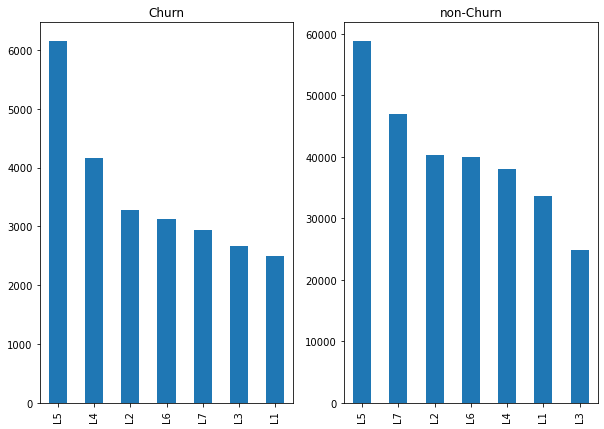

In [148]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
v1.CREDIT_BINS.value_counts().plot(kind='bar')
plt.title('Churn')
plt.subplot(1,2,2)
v0.CREDIT_BINS.value_counts().plot(kind='bar')
plt.title('non-Churn')
#Credit bins and their density for both the target values
#L5 is the most densely packed credit bin

Text(0.5, 1.0, 'non-Churn')

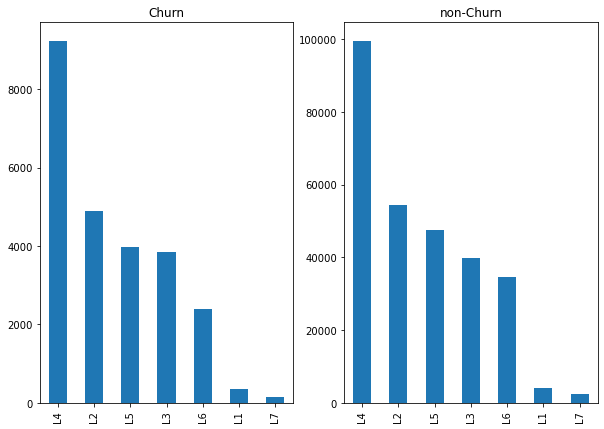

In [149]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
v1.INCOME_BINS.value_counts().plot(kind='bar')
plt.title('Churn')
plt.subplot(1,2,2)
v0.INCOME_BINS.value_counts().plot(kind='bar')
plt.title('non-Churn')
#Income bins for both the target values
#L4 is the most densely packed Income bin

Text(0.5, 1.0, 'non-Churn')

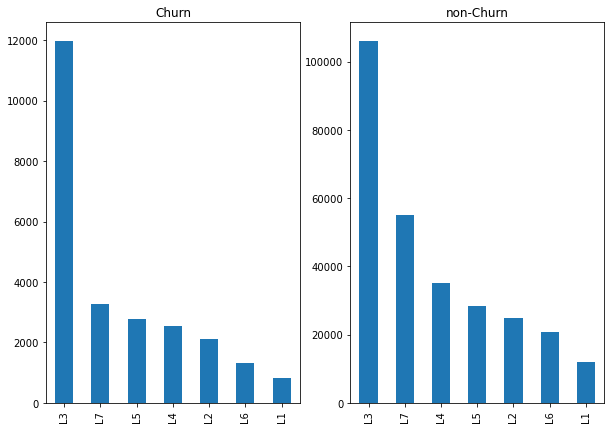

In [150]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
v1.GOODS_PRICE_BINS.value_counts().plot(kind='bar')
plt.title('Churn')
plt.subplot(1,2,2)
v0.GOODS_PRICE_BINS.value_counts().plot(kind='bar')
plt.title('non-Churn')
#goods price bins for both the target value.

L3 is the most densely packed price bin

Text(0.5, 1.0, 'Non-Churn')

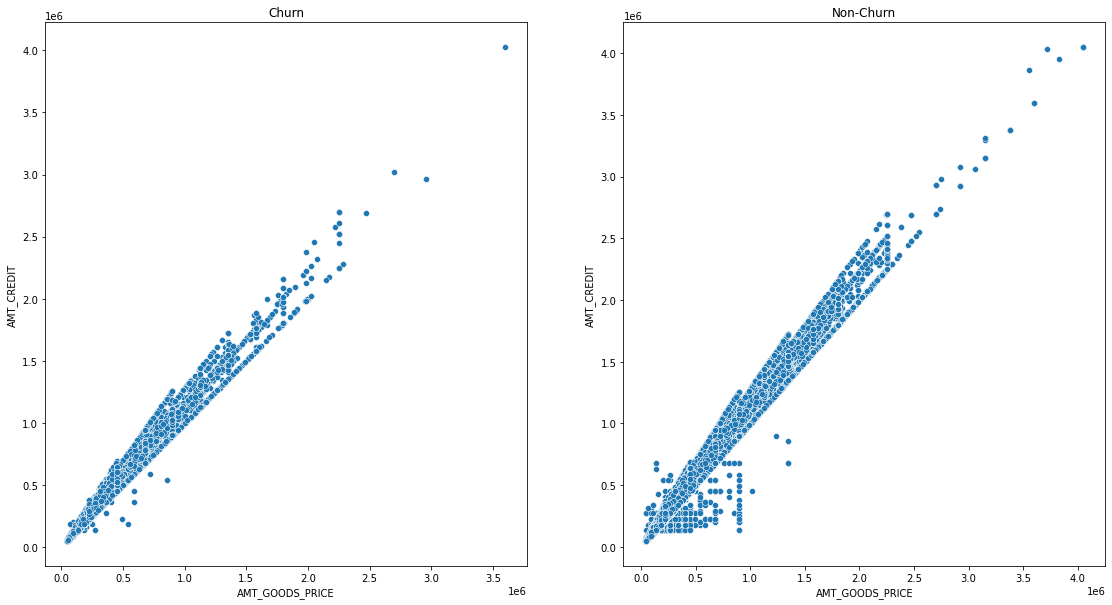

In [110]:
plt.figure(figsize=(19,10))
plt.subplot(1,2,1)
sns.scatterplot(x='AMT_GOODS_PRICE',y='AMT_CREDIT', data = v1)
plt.title('Churn')
plt.subplot(1,2,2)
sns.scatterplot(x='AMT_GOODS_PRICE',y='AMT_CREDIT', data = v0)
plt.title('Non-Churn')

#Customers have not churned very much for loans that have higher goods price/credit

Text(0.5, 1.0, 'Non-Churn')

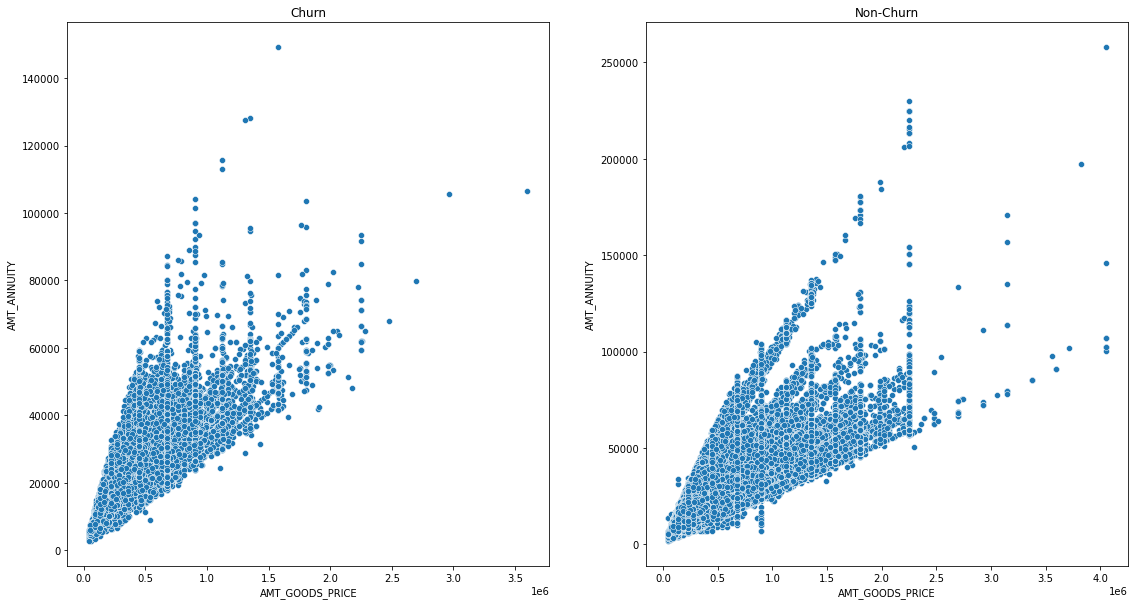

In [111]:
plt.figure(figsize=(19,10))
plt.subplot(1,2,1)
sns.scatterplot(x='AMT_GOODS_PRICE',y='AMT_ANNUITY', data = v1)
plt.title('Churn')
plt.subplot(1,2,2)
sns.scatterplot(x='AMT_GOODS_PRICE',y='AMT_ANNUITY', data = v0)
plt.title('Non-Churn')
#churn customers have lower annuity

Text(0.5, 1.0, 'Non-Churn')

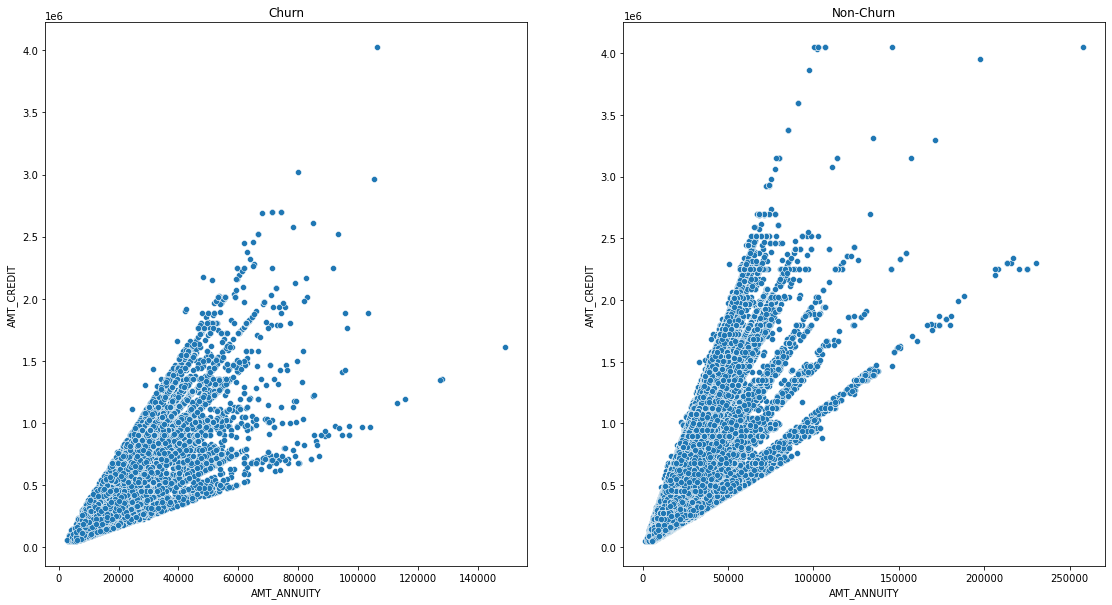

In [112]:
plt.figure(figsize=(19,10))
plt.subplot(1,2,1)
sns.scatterplot(x='AMT_ANNUITY',y='AMT_CREDIT', data = v1)
plt.title('Churn')
plt.subplot(1,2,2)
sns.scatterplot(x='AMT_ANNUITY',y='AMT_CREDIT', data = v0)
plt.title('Non-Churn')
#Churn customers have lower credit/annuity ratio

Text(0.5, 1.0, 'Non-Churn')

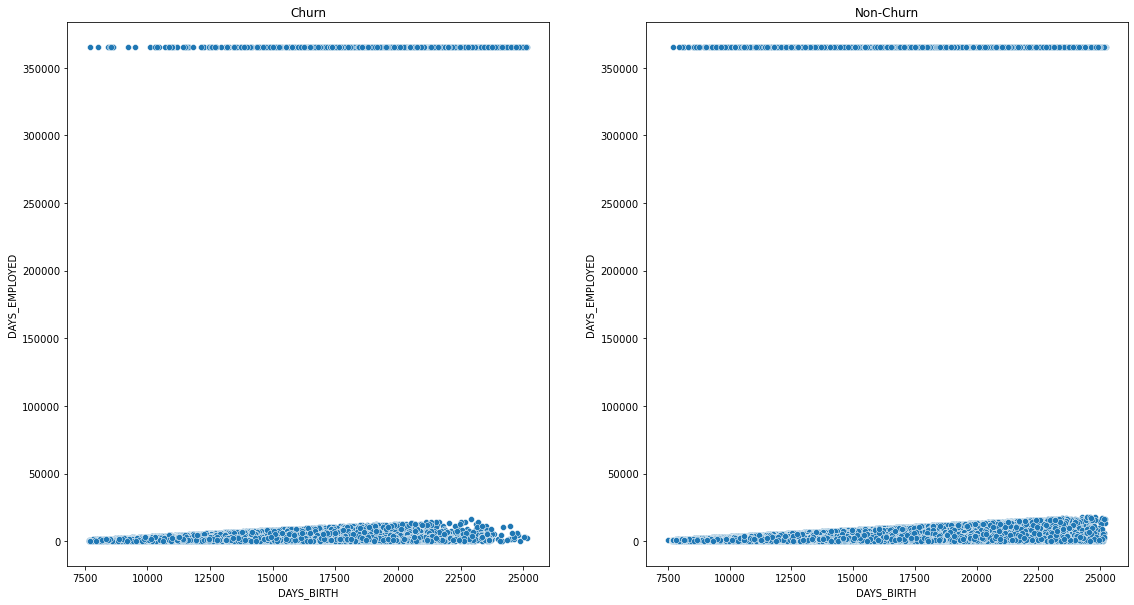

In [113]:
plt.figure(figsize=(19,10))
plt.subplot(1,2,1)
sns.scatterplot(x='DAYS_BIRTH',y='DAYS_EMPLOYED', data = v1)
plt.title('Churn')
plt.subplot(1,2,2)
sns.scatterplot(x='DAYS_BIRTH',y='DAYS_EMPLOYED', data = v0)
plt.title('Non-Churn')
#there seems to be no discernible difference between the Target groups

Text(0.5, 1.0, 'Non-Churn')

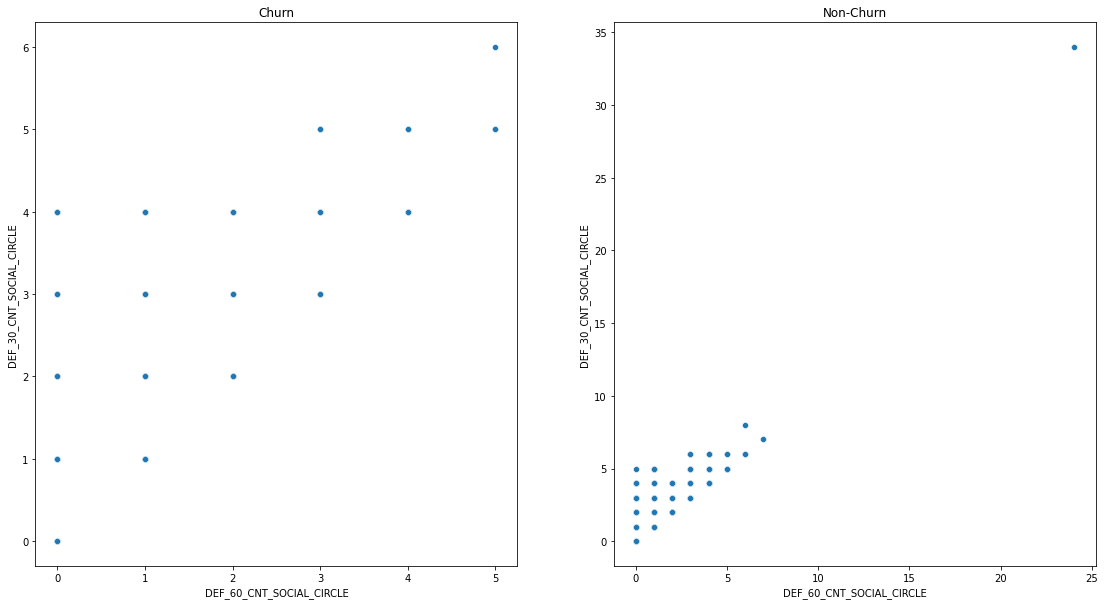

In [114]:
plt.figure(figsize=(19,10))
plt.subplot(1,2,1)
sns.scatterplot(x='DEF_60_CNT_SOCIAL_CIRCLE',y='DEF_30_CNT_SOCIAL_CIRCLE', data = v1)
plt.title('Churn')
plt.subplot(1,2,2)
sns.scatterplot(x='DEF_60_CNT_SOCIAL_CIRCLE',y='DEF_30_CNT_SOCIAL_CIRCLE', data = v0)
plt.title('Non-Churn')

These 5 pairs are same for both cases of TARGET value

In [118]:
test.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_RATING',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'INCOME_BINS', 'CREDIT_BINS', 'GOODS_PRICE_BINS'],
      dtype='object')

In [124]:


V = pd.pivot_table(v1, index = 'NAME_EDUCATION_TYPE', values = ['AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE'])


S = pd.pivot_table(v0, index = 'NAME_EDUCATION_TYPE', values = ['AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE'])



Text(0.5, 1.0, 'CONTRACT STATUS for TARGET=0')

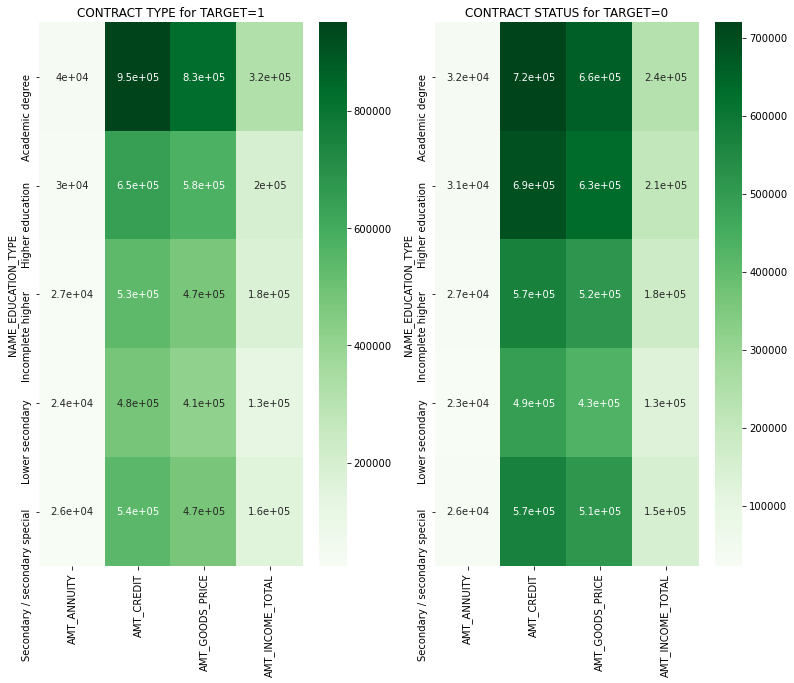

In [126]:
axes = plt.figure(figsize = (13,10))
plt.subplot(1,2,1)
ax=sns.heatmap(V, cmap='Greens', annot = True)
ax.set_title('CONTRACT TYPE for TARGET=1')
plt.subplot(1,2,2)
ax=sns.heatmap(S, cmap='Greens', annot = True)
ax.set_title('CONTRACT STATUS for TARGET=0')


Academic degree holders with higher credits, and higher goods prices have churned more. 

In [127]:

X = pd.pivot_table(v1, index = 'NAME_INCOME_TYPE', values = ['AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE'])


Y = pd.pivot_table(v0, index = 'NAME_INCOME_TYPE', values = ['AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE'])




Text(0.5, 1.0, 'INCOME TYPE for TARGET=0')

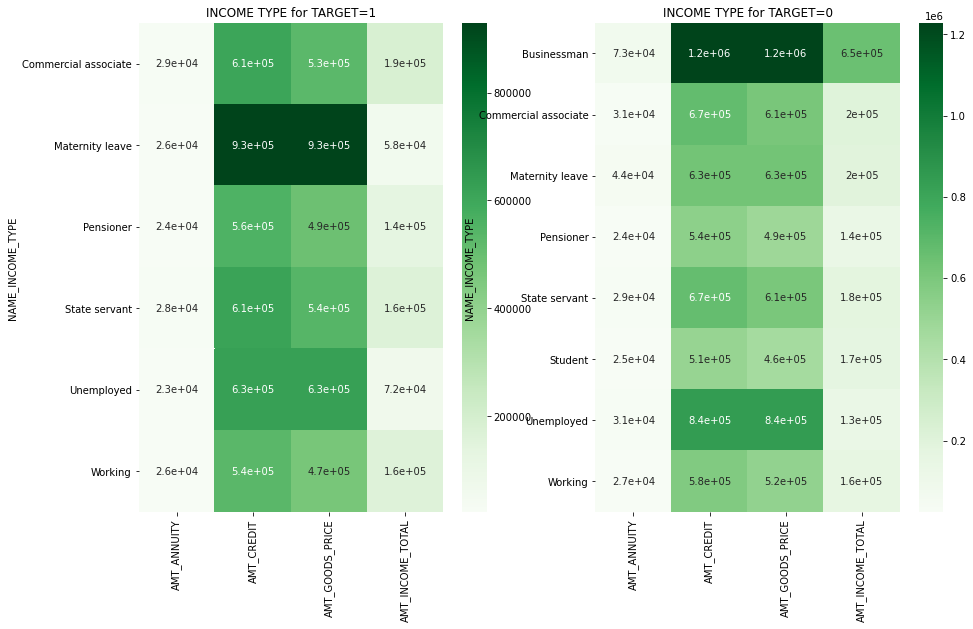

In [155]:
axes = plt.figure(figsize = (15,9))
plt.subplot(1,2,1)
ax=sns.heatmap(X, cmap='Greens', annot = True)
ax.set_title('INCOME TYPE for TARGET=1')
plt.subplot(1,2,2)
ax=sns.heatmap(Y, cmap='Greens', annot = True)
ax.set_title('INCOME TYPE for TARGET=0')

Those who are in maternity leave and have higher credit for high priced goods have churned more

In [132]:
W = pd.pivot_table(v1, index = 'NAME_FAMILY_STATUS', values = ['AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE'])


Z = pd.pivot_table(v0, index = 'NAME_FAMILY_STATUS', values = ['AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE'])



Text(0.5, 1.0, 'FAMILY STATUS for TARGET=0')

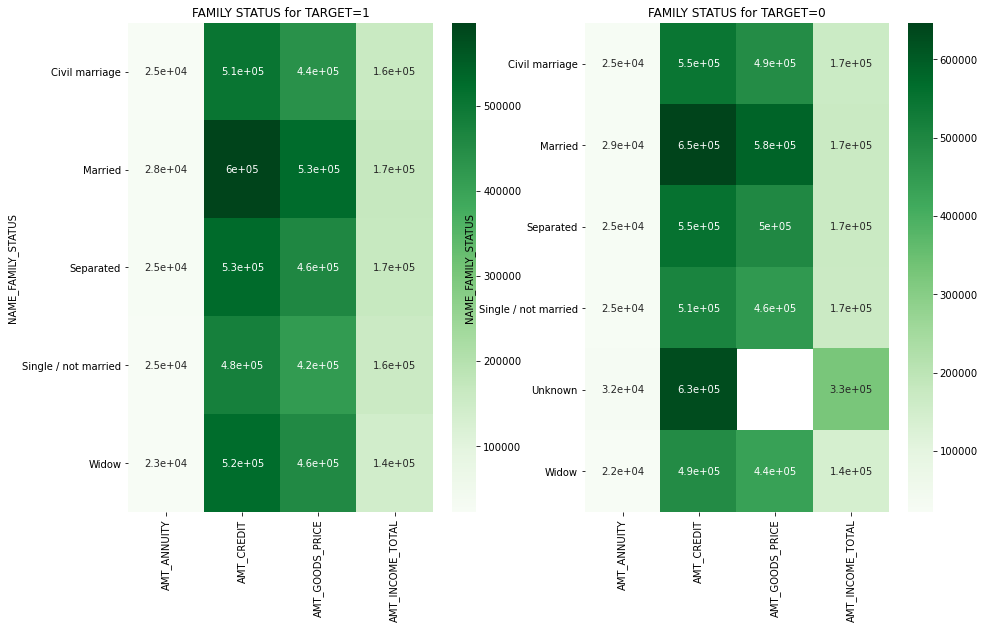

In [156]:
axes = plt.figure(figsize = (15,9))
plt.subplot(1,2,1)
ax=sns.heatmap(W, cmap='Greens', annot = True)
ax.set_title('FAMILY STATUS for TARGET=1')
plt.subplot(1,2,2)
ax=sns.heatmap(Z, cmap='Greens', annot = True)
ax.set_title('FAMILY STATUS for TARGET=0')

Married People Seem to be the most densly packed client category, naturally they have defaulted more